### Importing The Required Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
sis = pd.read_csv(r"C:\Users\YASH KUMAR\Desktop\Imarticus\seismic-bumps1.csv")

In [3]:
sis.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy_real      0
gpuls_real        0
gdenergy_real     0
gdpuls_real       0
ghazard           0
nbumps_real       0
nbumps2_real      0
nbumps3_real      0
nbumps4_real      0
nbumps5_real      0
nbumps6_real      0
nbumps7_real      0
nbumps89_real     0
energy_real       0
maxenergy_real    0
class             0
dtype: int64

#### Converting the Non-Numeric Data Into Numeric Data

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
sis[sis.select_dtypes(include = "object").columns] = sis[sis.select_dtypes(include = "object").columns].apply(le.fit_transform)

In [10]:
sis.drop(["nbumps6_real", "nbumps7_real", "nbumps89_real"], axis = 1)

In [99]:
import warnings 
warnings.filterwarnings("ignore")

### Visualizing the Data

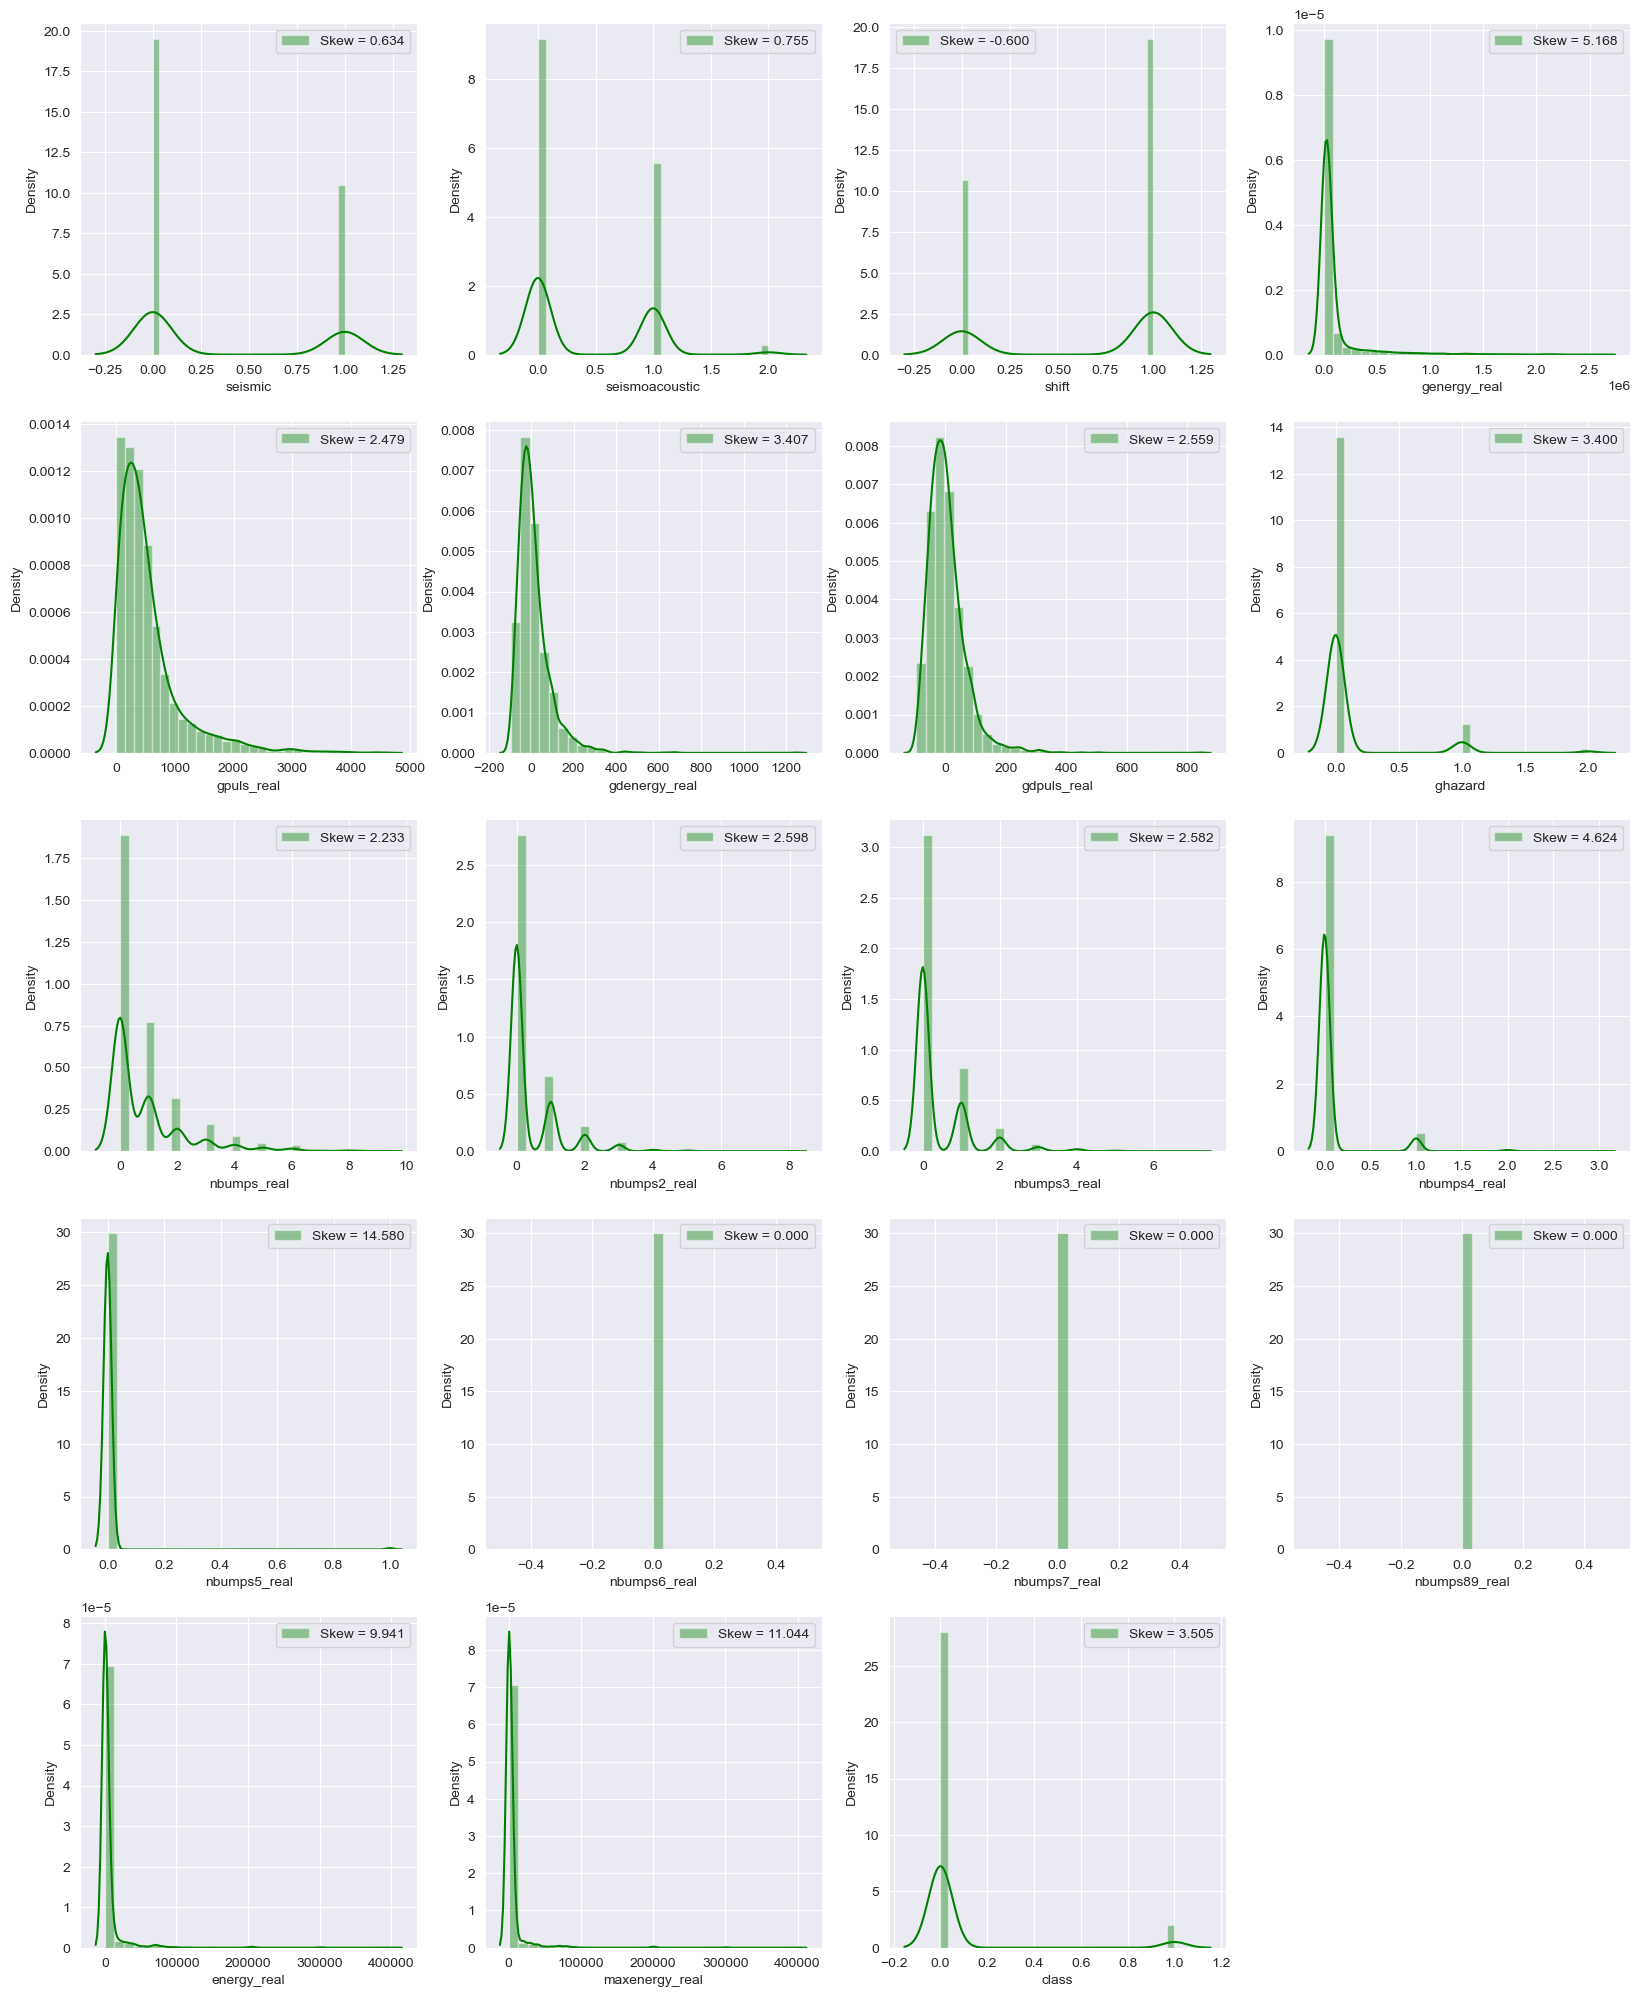

In [100]:
a=[cols for cols in sis.columns if sis[cols].dtypes != 'O']
plotnumber = 1
plt.figure(figsize=(20,25))
for i in a:
    if plotnumber<= 19:
        ax = plt.subplot(5,4,plotnumber)
        skew = sis[i].skew()
        sns.distplot(sis[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
        plt.legend(loc='best')
    plotnumber+=1
plt.show();

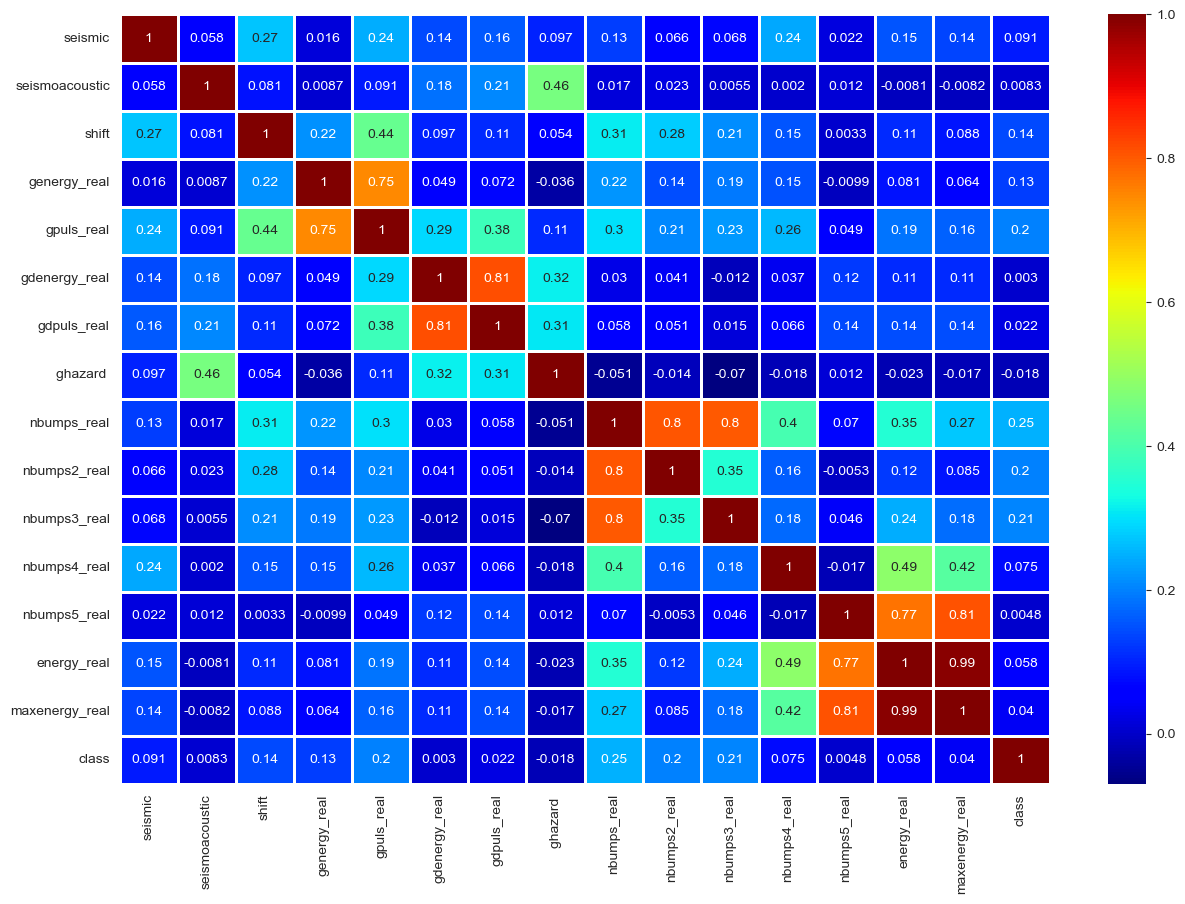

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white');

### Using Random Forest For Feature Selection

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [15]:
sis_x = sis.iloc[: , 0:-1]
sis_y = sis.iloc[: , -1]

In [16]:
from sklearn.feature_selection import RFE

In [17]:
rfe = RFE(rfc ,n_features_to_select =  10)

In [18]:
rfe.fit(sis_x  , sis_y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [19]:
rfe.support_

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False, False, False,  True,  True])

In [20]:
fea_imp = pd.DataFrame({"Feature" : sis_x.columns , "imp" : rfe.support_}) 

In [21]:
fea_imp.sort_values("imp" , ascending= False)

,Feature,imp
9,nbumps2_real,True
6,gdpuls_real,True
16,energy_real,True
10,nbumps3_real,True
1,seismoacoustic,True
8,nbumps_real,True
17,maxenergy_real,True
5,gdenergy_real,True
4,gpuls_real,True
3,genergy_real,True


### Building the model After doing  Feature selection

In [22]:
df = sis[["nbumps2_real" , "gdpuls_real" , "energy_real" , "nbumps3_real" , "seismoacoustic" , "nbumps_real" , "maxenergy_real",
        "gdenergy_real", "gpuls_real" , "genergy_real" , "class" ]]

In [23]:
df.head()

,nbumps2_real,gdpuls_real,energy_real,nbumps3_real,seismoacoustic,nbumps_real,maxenergy_real,gdenergy_real,gpuls_real,genergy_real,class
0,0,-72,0,0,0,0,0,-72,48,15180,0
1,0,-79,2000,1,0,1,2000,-70,33,14720,0
2,0,-78,0,0,0,0,0,-81,30,8050,0
3,0,40,3000,1,0,1,3000,-23,171,28820,0
4,0,-52,0,0,0,0,0,-63,57,12640,0


In [24]:
df_x = df.iloc[: , 0:-1]
df_y = df.iloc[: , -1]

#### Scaling the Data Using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
df_x = pd.DataFrame(scaler.fit_transform(df_x), columns = df_x.columns)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size=.2 , random_state= 42)

In [29]:
df_train_y.value_counts()

0    1930
1     137
Name: class, dtype: int64

In [101]:
scaler.mean_

array([3.93575851e-01, 4.50890093e+00, 4.97527090e+03, 3.92801858e-01,
       4.07120743e-01, 8.59520124e-01, 4.27885062e+03, 1.23757740e+01,
       5.38579334e+02, 9.02425232e+04])

#### Using SMOTE for ClassImbalance

In [30]:
import imblearn
from imblearn.over_sampling import SMOTE

In [31]:
sm = SMOTE(sampling_strategy= 1)

In [32]:
train_x , train_y = sm.fit_resample(df_train_x , df_train_y)

In [33]:
train_y.value_counts()

0    1930
1    1930
Name: class, dtype: int64

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
logreg.fit(train_x , train_y)

LogisticRegression()

In [36]:
pred = logreg.predict(df_test_x)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [37]:
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score

In [38]:
confusion_matrix(df_test_y , pred)

array([[389,  95],
       [  9,  24]], dtype=int64)

In [77]:
accuracy_LR = accuracy_score(df_test_y , pred)
accuracy_LR

0.7988394584139265

In [78]:
recall_LR = recall_score(df_test_y , pred)
recall_LR

0.7272727272727273

In [79]:
precision_LR = precision_score(df_test_y , pred)
precision_LR

0.20168067226890757

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [43]:
dt.fit(train_x , train_y)

DecisionTreeClassifier()

In [44]:
pred_dt = dt.predict(df_test_x)

In [45]:
confusion_matrix(df_test_y , pred_dt)

array([[416,  68],
       [ 24,   9]], dtype=int64)

In [80]:
accuracy_DT = accuracy_score(df_test_y , pred_dt)
accuracy_DT

0.8220502901353965

In [81]:
recall_DT = recall_score(df_test_y , pred_dt)
recall_DT

0.2727272727272727

In [82]:
precision_DT = precision_score(df_test_y , pred_dt)
precision_DT

0.11688311688311688

### Random Forest

In [49]:
rfc.fit(train_x , train_y)

RandomForestClassifier()

In [50]:
pred_rfc = rfc.predict(df_test_x)

In [51]:
confusion_matrix(df_test_y , pred_rfc)

array([[446,  38],
       [ 26,   7]], dtype=int64)

In [83]:
accuracy_RFC = accuracy_score(df_test_y , pred_rfc)
accuracy_RFC

0.8762088974854932

In [84]:
recall_RFC = recall_score(df_test_y , pred_rfc)
recall_RFC

0.21212121212121213

In [85]:
precision_RFC = precision_score(df_test_y , pred_rfc)
precision_RFC

0.15555555555555556

### XGB Boost

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [56]:
xgb.fit(train_x , train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
pred_xgb = xgb.predict(df_test_x)

In [58]:
confusion_matrix(df_test_y , pred_xgb)

array([[448,  36],
       [ 26,   7]], dtype=int64)

In [86]:
accuracy_XGB = accuracy_score(df_test_y , pred_xgb)
accuracy_XGB

0.8800773694390716

In [87]:
recall_XGB = recall_score(df_test_y , pred_xgb)
recall_XGB

0.21212121212121213

In [88]:
precision_XGB = precision_score(df_test_y , pred_xgb)
precision_XGB

0.16279069767441862

### Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [63]:
gbc.fit(train_x , train_y)

GradientBoostingClassifier()

In [64]:
pred_gbc = gbc.predict(df_test_x)

In [65]:
confusion_matrix(df_test_y , pred_gbc)

array([[424,  60],
       [ 19,  14]], dtype=int64)

In [89]:
accuracy_GB = accuracy_score(df_test_y , pred_gbc)
accuracy_GB

0.8471953578336557

In [90]:
recall_GB = recall_score(df_test_y , pred_gbc)
recall_GB

0.42424242424242425

In [91]:
precision_GB = precision_score(df_test_y , pred_gbc)
precision_GB

0.1891891891891892

### ADA Boosting

In [69]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [70]:
abc.fit(train_x , train_y)

AdaBoostClassifier()

In [71]:
pred_abc = abc.predict(df_test_x)

In [72]:
confusion_matrix(df_test_y , pred_abc)

array([[397,  87],
       [ 14,  19]], dtype=int64)

In [92]:
accuracy_ADA = accuracy_score(df_test_y , pred_abc)
accuracy_ADA

0.804642166344294

In [93]:
recall_ADA = recall_score(df_test_y , pred_abc)
recall_ADA

0.5757575757575758

In [94]:
precision_ADA = precision_score(df_test_y , pred_abc)
precision_ADA

0.1792452830188679

### Naive Bayes

In [110]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

In [111]:
nb.fit(train_x , train_y)

BernoulliNB()

In [112]:
pred_nb = nb.predict(df_test_x)
pred_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [113]:
confusion_matrix(df_test_y , pred_nb)

array([[359, 125],
       [  5,  28]], dtype=int64)

In [118]:
accuracy_NB = accuracy_score(df_test_y , pred_nb)
accuracy_NB

0.7485493230174082

In [117]:
recall_NB = recall_score(df_test_y , pred_nb)
recall_NB

0.8484848484848485

In [119]:
precision_NB = precision_score(df_test_y , pred_nb)
precision_NB

0.1830065359477124

In [122]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'DecisionTreeClassifier', 
                                                      'RandomForestClassifier',
                                                          'Naive Bayes' , 
                                                      'XGBClassifier',
                                                    'GradientBoostingClassifier',
                                                    'AdaBoostClassifier'],
                                            'Accuracy': [accuracy_LR,
                                                         accuracy_DT,
                                                         accuracy_RFC,
                                                         accuracy_NB ,
                                                         accuracy_XGB,
                                                        accuracy_GB,
                                                        accuracy_ADA],
                                          'Recall' : [recall_LR,
                                                     recall_DT,
                                                     recall_RFC,
                                                      recall_NB,
                                                     recall_XGB,
                                                     recall_GB ,
                                                     recall_ADA],
                                          'Precision' : [precision_LR,
                                                        precision_DT,
                                                        precision_RFC,
                                                         precision_NB,
                                                        precision_XGB,
                                                        precision_GB, 
                                                        precision_ADA]})

In [123]:
import tabulate as tb
print(tb.tabulate(model_performance_accuracy, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════════════════════╤════════════╤══════════╤═════════════╕
│    │ Model                      │   Accuracy │   Recall │   Precision │
╞════╪════════════════════════════╪════════════╪══════════╪═════════════╡
│  0 │ LogisticRegression         │   0.798839 │ 0.727273 │    0.201681 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  1 │ DecisionTreeClassifier     │   0.82205  │ 0.272727 │    0.116883 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  2 │ RandomForestClassifier     │   0.876209 │ 0.212121 │    0.155556 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  3 │ Naive Bayes                │   0.748549 │ 0.848485 │    0.183007 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  4 │ XGBClassifier              │   0.880077 │ 0.212121 │    0.162791 │
├────┼────────────────────────────┼────────────┼──────────┼─────────────┤
│  5 │ GradientBoostingClassifier │   

### Conclusion

A machine learning model to classify hazardous seismic events in the Seismic Bumps dataset. The model utilized the Naive Bayes Algorithm with SMOTE oversampling technique and achieved a  accuracy of 74.8% and recall of 84.8% for the hazardous class.

The developed model provides a valuable tool for identifying and predicting hazardous seismic events, which can contribute to improving safety and response measures in areas affected by seismic activity.